# File input/output

In this section and the next, you will create a number of data structures:

| Object Name | Object Description |
|---|---|
| gene_file | string of file name of mouse genome selection |
| fopen | list where each element is a line of gene_file |
| gene_info | dict of the contents of gene_file, where keys are gene names and values are everything associated with them |
| chroms | list of all the chromosomes included in gene_info |
| gene_counts | dict with chromosome name as key and number of genes contained as value |
| fa_file | string of file name of FASTA formatted select mouse gene sequences (selChroms.mm9.fa.zip) |
| seq_dict | dict of the fa_file content (short dict, lots of sequence) |
| cntn4 | string of Cntn4 gene identifier, uc009dcr.2 |
| hchr | string of chromosome number of Cntn4 gene location |
| hst | string of location of start site of Cntn4 gene |
| hen | string of location of end site of Cntn4 gene |
| cntn4_seq | string of sequence of Cntn4 |
| gene_lengths | dict of gene names as keys, and gene lengths as values |
| in_gene | set of gene names as keys, and the range of the indices of chromosome location. |
| chr6_starts | dict of chromosome 6 gene names as keys, and their start sites as values. |
| tata_dist | dict of gene names as keys, and the index, if any, of the nearest TATA to its start. |


## Importing course module functions

Since you followed the instructions in [Downloading Necessary Files](https://courses.edx.org/courses/course-v1:MITx+7.QBWx+2T2022/jump_to_id/ec0617e829984077b9670f3fdbea25e4), your working directory now contains the downloaded Python module. Instead of importing the entire module, we will just grab the associated functions from it using this command. This makes it easier to call the commands later on:

In [1]:
from qbwPythonModule import *

## input/ouput: opening the data in Python

You have downloaded a list of genes from part of the mouse genome. This is data from the [UCSC genome browser](http://genome.ucsc.edu/) that maintains genomic information across many organisms as they have been sequenced.

First, assign the file name to a variable so that you do not have to type it too frequently.

In [2]:
gene_file='mm9_sel_chroms_knownGene.txt' # mouse chromosome sequences

Now reading a file is straightforward in Python.  The easiest way is to use the readlines command to get the file in a list, where each element in the list is the content of a line.

In [3]:
fopen=open(gene_file).readlines() # readlines() retunrs a list containing each line in the file

Now that the file is simply a list, you can check its length:

In [4]:
len(fopen)

10674

There should be 10,674 lines in the file.

You can now access fopen to peek at various parts of the list:

In [5]:
fopen[0]

'uc009auw.1\tchr6\t+\t3238518\t3267019\t3238518\t3238518\t3\t3238518,3264405,3266613,\t3238700,3264550,3267019,\t\tuc009auw.1\n'

In [6]:
fopen[1999]

'uc009dmc.2\tchr6\t-\t119265150\t119280784\t119267073\t119273733\t5\t119265150,119270438,119273666,119274218,119280512,\t119267528,119271029,119273795,119274426,119280784,\tQ8BGX3\tuc009dmc.2\n'

However, this is pretty difficult to interpret.  The course module you loaded earlier contains a command called loadGeneFile designed to parse this file automatically into a nice dictionary.

In [7]:
gene_info=loadGeneFile(gene_file)

Parsed info for 10674 genes on 4 chromosomes


Now you can use the dictionary structure to analyze the data in the file. The keys of the dictionary represent gene names. 

In [8]:
#gene_info.keys()

Each gene name can be used to access the necessary information, such as the chromosome and position of the gene on the chromosome:

In [9]:
gene_info['uc009auw.1']['chr']

'chr6'

In [10]:
gene_info['uc009auw.1']['start']

3238518

## evaluating the data

### counting chromosomes

The first question to ask is how many chromosomes are in this file?  I only selected a subset to be included in this course. 

To count the chromosomes we first create a list. Then for each gene, we look to see if the chromosome is in list.  If not, we add it:

In [11]:
chroms=[]

for k in gene_info.keys():
    chrom=gene_info[k]['chr']
    if chrom not in chroms:
        chroms=chroms+[chrom]

# final list of chromosomes
chroms

['chr6', 'chr11', 'chr15', 'chr16']

### counting genes

Now for each chromosome we can count how many genes are on each chromosome by navigating through the dictionary of information.

We first create a dictionary to store the relevant information. Then we can populate that new dictionary using two for loops: one for each chromosome and one for each gene:

In [12]:
gene_counts={}

# we iterate through each of the chromosomes we have collected and count how many genes are on that chromosome
for chrom in chroms:
    chrom_count=0 
    for k in gene_info.keys():
        if gene_info[k]['chr']==chrom:
            chrom_count+=1
    gene_counts[chrom]=chrom_count

# you should have a dictionary where the chromosome names are the keys and the values are the number of genes on each chromosome.
gene_counts

{'chr6': 2990, 'chr11': 3899, 'chr15': 2110, 'chr16': 1675}

# Finding Annotated Genes in Genomic Data

Now that we have the gene information, it is time to read in the raw gene sequences. These sequences are stored in what is called the FASTA format, which originated in the 80s to align protein sequences and is now the standard way to view gene or protein sequences. 

In [13]:
fa_file='selChroms_mm9.fa.zip'

The course module has a function to load these sequences into a dictionary.  Be careful, it might take a minute or two.

In [14]:
seq_dict=loadFasta(fa_file)

will load from zip
Parsed line 10000
Parsed line 20000
Parsed line 30000
Parsed line 40000
Parsed line 50000
Parsed line 60000
Parsed line 70000
Parsed line 80000
Parsed line 90000
Parsed line 100000
Parsed line 110000
Parsed line 120000
Parsed line 130000
Parsed line 140000
Parsed line 150000
Parsed line 160000
Parsed line 170000
Parsed line 180000
Parsed line 190000
Parsed line 200000
Parsed line 210000
Parsed line 220000
Parsed line 230000
Parsed line 240000
Parsed line 250000
Parsed line 260000
Parsed line 270000
Parsed line 280000
Parsed line 290000
Parsed line 300000
Parsed line 310000
Parsed line 320000
Parsed line 330000
Parsed line 340000
Parsed line 350000
Parsed line 360000
Parsed line 370000
Parsed line 380000
Parsed line 390000
Parsed line 400000
Parsed line 410000
Parsed line 420000
Parsed line 430000
Parsed line 440000
Parsed line 450000
Parsed line 460000
Parsed line 470000
Parsed line 480000
Parsed line 490000
Parsed line 500000
Parsed line 510000
Parsed line 520000
Pa

In [15]:
len(seq_dict)

4

In [16]:
seq_dict.keys()

dict_keys(['chr6', 'chr11', 'chr15', 'chr16'])

Now we can use the gene information that we previously loaded to find genes within a chromosome.  

Let's start with a gene Cntn4, which has has been assigned the identifer of uc009dcr.2 by the genome browser gurus at UCSC:

In [17]:
cntn4="uc009dcr.2"

Now we can find out the chromosomal location of Cntn4 using our gene_info dictionary to get all the relevant data we collected:


In [18]:
gene_info[cntn4]

{'chr': 'chr6', 'start': 105627738, 'end': 106624264, 'strand': '+'}

To get the sequence for Cntn4, we need to first figure out what chromosome it is on:

In [19]:
gene_info[cntn4]['chr']

'chr6'

Individual chromosomes contain MANY base pairs, making it hard to access them directly.  We can use Python's built in string commands to determine how long the string representing chromosome 6 is:

In [20]:
len(seq_dict['chr6'])

149517037

Using the len() function, how long is chromosome 6? Enter only the number. Do not include commas or other symbols.  
How long is chromosome 16?

In [21]:
len(seq_dict['chr16'])

98319150

## Getting Genetic Information

We can peek into the entire chromosomal sequence where we know Cntn4 to reside:

In [22]:
hchr=gene_info[cntn4]['chr']
hst=gene_info[cntn4]['start']
hen=gene_info[cntn4]['end']

Now we can use this information to pull out the sequence of interest.

In [23]:
cntn4_seq=seq_dict[hchr][hst:hen]

#cntn4_seq

len(cntn4_seq)

996526

### Getting Information about Genes

We can now query the genomic information for various genes of interest and determine information about them.

The gene Matn2 has the UCSC identifier of "uc007vll.1". Using this information, repeat the steps given previously to extract the following information:

On what chromosome is Matn2 located?

In [24]:
matn2 = "uc007vll.1"
gene_info[matn2]

{'chr': 'chr15', 'start': 34236435, 'end': 34277600, 'strand': '+'}

Now assign the Matn2 sequence to the variable matn2_seq similar to what was done with Cntn4. Now we can study this gene.

What is the length of the Matn2 gene in base pairs?

In [25]:
hchr=gene_info[matn2]['chr']
hst=gene_info[matn2]['start']
hen=gene_info[matn2]['end']

matn2_seq=seq_dict[hchr][hst:hen]

len(matn2_seq)

41165

## Reading the Genome

Now that we have the raw sequence data, we can "peek" at the genes themselves to see what they look like.  
Since each sequence is just as string of characters, we can find specific parts of that gene.  

In [26]:
# cntn4_seq
cntn4_seq[5:200]

'GAGGGAGAGGAACGCGCGGCAGCCACAGAGCACAAGGTTCATAACCAGGATTGGTCGCAAGTAGGGAGCTTTTGCCACTCCGCCGGGACCTTCGGACGTTGGCGGTGGAGCAAGCCCAGTTCTCCTAGGCGCTGTGCTTGGGTAAGTCCAGCCCGACTCTGGAGCGCACTGTCCCAGGCACCCTGGTCTGTGGCT'

Can you figure out what the gene does yet?

Probably not, but we can apply our knowledge of biology to better understand what this gene does, starting with the sequence of the protein it encodes. First, we can figure out exactly which part of the gene encodes a protein and what the protein looks like. DNA sequences encode proteins using a three-letter alphabet such that each of the 20 amino acids that comprise protein sequences is represented by a distinct set of 3-letter nucleic acid combinations.  

Translation of the protein occurs at the start codon, represented by the three base pairs ATG.  We can identify where translation begins in the Cntn4 gene sequence using the index command, built into the Python string library:

In [27]:
cntn4_seq.index('ATG')

214

### Translating the Genome

Using the Matn2 identifier and the Matn2 sequence defined previously, use the commands you have learned to view the first part of the Matn2 sequence.

What are the first ten nucleic acids (nucleotides) in the Matn2 gene? Enter the sequence as capital letters, with no spaces or punctuation. What is the index of the translation initation codon (ATG) in the Matn2 gene?

In [28]:
matn2_seq[:10]

'TTTCAGGGAG'

In [29]:
matn2_seq.index('ATG')

48

## From genetics to genomics

The information we collected so far can easily be done on a website. There are many organism-specific sites of gene information, such as the [Mouse Genome Informatics](http://www.informatics.jax.org/) website or across many species using the [UCSC genome browser](http://genome.ucsc.edu/).

High throughput technologies such as [RNA-Seq](http://en.wikipedia.org/wiki/RNA-Seq) require more systematic approaches to analyzing gene information.  For example, the output of a high throughput sequencer is a series of short DNA sequence reads, usually in a version of the FASTA format.  To quantify the amount of DNA mapping to each individual gene, algorithms must first **align** the sequences to the genome.  But aligning alone is not enough, as longer genes are more likely to have reads than shorter genes.  As a result, the length of genes is an important thing to know.   

Using the gene_info dictionary, we can find out the length of every gene on the four chromosomes we collected. 

FIrst, we import the NumPy module to include more complicated mathematic calculations. Now we can find the start and end of each gene, and store the difference:

In [30]:
import numpy as np

In [31]:
gene_lengths={}

for g in gene_info.keys():
    st=gene_info[g]['start']
    en=gene_info[g]['end']
    gene_lengths[g]=np.absolute(en-st)

Now we can use pyplot's basic plotting tools in matplotlib to create a histogram.  
You can alter the color to green by adding an additional color argument.

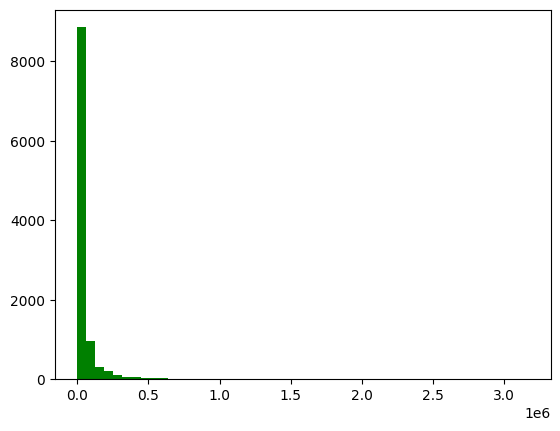

In [32]:
import matplotlib.pyplot as plt

plt.hist(gene_lengths.values(), bins=50, facecolor='green');

This histogram remains largely unsatisfying, mainly because there are so many shorter genes and just a few really long genes, leaving many bins of the histogram empty.  
To fix, this, we can move to a logarithmic scale.  This is easily done by specifying the scale of the y-axis:

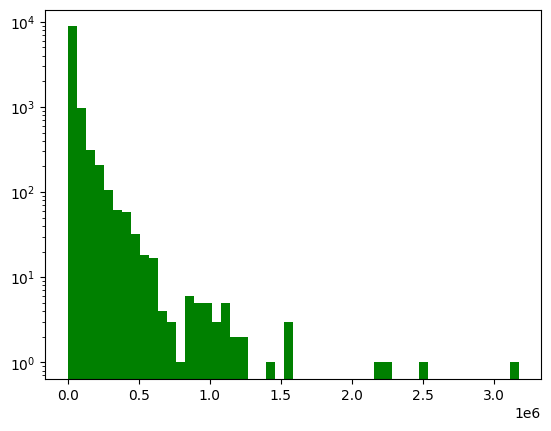

In [33]:
plt.hist(gene_lengths.values(), bins=50, log=True, facecolor='green');

Using the max function, what is the length of the longest gene in the gene_lengths dictionary?  

Gene lengths can vary based on the size of the encoding protein, but also with the distribution across the genome. Genes are broken down into exons, which encode the final protein, and separated by introns, which are spliced out before the transcribed RNA is translated. The more introns, the longer a gene is.  

Since Python can do basic math, what is the difference between the length of Cntn4 and the longest gene?

In [34]:
max(gene_lengths.values())

3171331

In [35]:
print("Difference between the length of Cntn4 and the longest gene =", max(gene_lengths.values()) - len(cntn4_seq))

Difference between the length of Cntn4 and the longest gene = 2174805


## Exploring the Non-coding Regions

### Outside the coding region

With the developments in whole-genome sequencing, we can not only study the coding regions of the DNA - those that encode for proteins - but also the millions of basepairs that DO NOT encode for proteins.

Why would these regions be of interest? Because they contain regulatory regions that help turn genes on and off.  These regions, often conserved across evolution, are tuned to enable the binding of specific proteins that can kick-start the process of transcription.  

To get a sense of just how much DNA is devoted to these regulatory regions, we can use the gene_info data structure to count how many base pairs are in genes compared to those that are not.  

We first initialize a new data structure, a set.  A set is able to store items, like a list, but only keeps those that are unique. This is helpful because it removes duplicates automatically. 

This is important because there are regions in the genome where genes overlap - some genes are in the non-translated regions of other genes, and some genes overlap on opposite strands.  Here is an image of that on the genome browser:

![overlapping transcripts of genes Ssxb1, Ssxb2 and Ssxb9](https://courses.edx.org/assets/courseware/v1/82304d9c33cde519742fd0a569ee01b7/asset-v1:MITx+7.QBWx+2T2022+type@asset+block/mouse_browser_gene_example_simple.png)

Overlapping transcripts of genes named Ssxb1, Ssxb2, and Ssxb9 are shown as dark and light blue lines, with arrow heads indicating the direction of transcription.

Therefore, to keep track of truly non-coding regions of the genome, we need to make sure we are not double-counting. To do this we are going to track the indices, or positions, of chromosome 6, such that we do not add in a position to our list of coding regions if it has already been accounted for in another gene.  We can do this several ways. First, let's look at the simple but **memory intensive** way, using a set.

In [36]:
# creates an empty set object. Sets are collections of unordered unique values
in_gene=set()

# looping through all the genes in chromosome 6, we find every sequence index assigned to the gene
for gene in gene_info.keys():
    if gene_info[gene]['chr']=='chr6':
        gene_inds=range(gene_info[gene]['start'],gene_info[gene]['end'])

# now we update the set with the indices of the current gene
# because it is a set, even if the indices were already entered as a different gene, we will not get duplicate entries
        in_gene.update(gene_inds)

len(in_gene)

67695635

This might take a while to compute (or cause a memory error). We can also do this less directly using a boolean array.

In [45]:
# Create a boolean Numpy array the same length as the chromosome
# Initially, every entry will be False
chr6_length = len(seq_dict['chr6'])

in_gene_numpy = np.zeros(chr6_length, dtype=np.bool)

# Loop through the genes, switching entries to True if they are found
for gene in gene_info.keys():
    start_ind = gene_info[gene]['start']
    end_ind = gene_info[gene]['end']
    in_gene_numpy[start_ind:end_ind] = True

# Get the answer by summing the Numpy array
# True values are treated as 1, False as 0, so the sum of the array will be
# the # number of index sites that are coding sites (the length of coding sequence in chr6)
num_in_gene = in_gene_numpy.sum()

print(num_in_gene)

116554693


c:\Users\Sébastien\Documents\data_science\biostatistics\quantitative_biology_workshop_mit\w6_genomics_python\.env\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


_It looks like the duplicated coding base pairs haven't been removed using this approach..._

### Size of Chromosome 6

Now that we have used Python to count coding DNA we can evaluate just how much of chromosome 6 is devoted to encoding genes.

What is the total size of chromosome 6 in base pairs?

In [41]:
len(seq_dict['chr6'])

149517037

How many base pairs of coding DNA are on chromosome 6?

In [43]:
len(in_gene)

67695635

How many non-coding base pairs are on chromosome 6?

In [44]:
print("Number of non-coding base pairs = ", len(seq_dict['chr6']) - len(in_gene))

Number of non-coding base pairs =  81821402


What fraction of chromosome 6 is made up of non-coding DNA? 

In [47]:
1 - len(in_gene) / len(seq_dict['chr6'])

0.5472379846585644

### Gene Regulatory Regions

As you can see, a large portion of chromosome 6 is not used to encode RNA molecules. However, many parts of the non-coding genome are still highly conserved across species, suggesting that they still can play a role in the cell.  The role of the non-coding genome is to regulate gene expression. Embedded in the non-coding regions of DNA are short signals or motifs that help proteins bind the DNA to begin the process of transcription. 

While there is a large body of research studying gene regulation and how genes are turned on and off, we can get a taste of this type of analysis by looking at a single motif "TATA" called the TATA binding motif.  

This motif is implicated in transcription initiation when found nearby the transcription start site of genes.  Given that we now have the transcription start sites of all mouse genes and their neighboring sequences, we can use built-in python commands to determine how many have a TATA binding motif.

### Motif Finding

Specifically, we can use the count command to identify how many times a certain sequence occurs in a large sequence. In this case, we can use it to count the occurrence of the TATA motif:

In [48]:
seq_dict['chr6'].upper().count('TATA')

734533

There are over 700000 occurrences of this motif on a single chromosome!  Remember how many genes there were?

In [50]:
gene_counts['chr6']

2990

Less than 3000!   

Clearly not every occurrence of TATA means that there is transcription initiation, other sequence motif play a role as well.  So we are going to search for the binding sites that are more relevant to each gene.  Luckily, we can find all the transcription start sites using a basic loop through our gene_info dictionary and a module-derived function called getTssOnChroms:

In [51]:
chr6_starts=getTssOnChroms(gene_info,'chr6')

Now the dictionary chr6_starts contains the starting point of all genes on chromosome 6. 

We can assume that TATA binding relevant to transcription is within a small window of the transcription start site.  Here we look for a window of 40 base pairs upstream.  Note that the definition of upstream varies based on whether the gene is found on the + or - strand of DNA:

In [52]:
tata_dist={}

for g in chr6_starts.keys():
    e=chr6_starts[g]
    strand=gene_info[g]['strand']
    if strand=='+':
        s=e-40
    else:
        s=e
        e=s+40
    if 'TATA' in seq_dict['chr6'][s:e].upper():
        if strand=='+':
            tata_dist[g]=seq_dict['chr6'][s:e].upper().rindex('TATA')
        else:
            tata_dist[g]=seq_dict['chr6'][s:e].upper().index('TATA')

This loop stores the index of the TATA motif - either from the end of the promoter region or the beginning (depending on strand). Now we can use the tata_dist dictionary to identify genes that contain a TATA binding motif nearby and can therefore be regulated by the TATA binding protein.  
Using the len function, determine the length of the tata_dist object. How many genes had a motif within 40 base pairs of the trancription start site?

In [53]:
len(tata_dist)

193

Calculate the mean distance from the transcription start sites from tata_dist using the sum function and your answer from the previous problem. Enter your answer as a number with 4 significant figures.

In [57]:
tata_dist

{'uc009avd.2': 32,
 'uc009avl.1': 12,
 'uc009avm.1': 12,
 'uc009awd.2': 23,
 'uc009awi.1': 23,
 'uc009awo.1': 30,
 'uc009axx.1': 18,
 'uc009ays.1': 8,
 'uc009azo.1': 32,
 'uc009bak.1': 1,
 'uc009bar.1': 25,
 'uc009bcv.1': 9,
 'uc009bex.1': 13,
 'uc009bfc.1': 24,
 'uc009bfn.1': 11,
 'uc009bfo.1': 10,
 'uc012ejm.1': 2,
 'uc009bfy.1': 24,
 'uc009bgg.1': 15,
 'uc009bil.1': 34,
 'uc012ejx.1': 6,
 'uc012ejz.1': 2,
 'uc009bku.2': 30,
 'uc009bld.1': 29,
 'uc009ble.1': 29,
 'uc012ekg.1': 10,
 'uc009bnf.2': 10,
 'uc009bnn.1': 6,
 'uc009vds.1': 28,
 'uc009bno.1': 26,
 'uc009bnr.2': 2,
 'uc009bom.1': 32,
 'uc012eks.1': 15,
 'uc009bos.1': 9,
 'uc009bot.2': 25,
 'uc009bov.2': 24,
 'uc009bow.2': 29,
 'uc009box.2': 31,
 'uc009vdt.1': 7,
 'uc009boy.2': 9,
 'uc009boz.2': 24,
 'uc009bpw.2': 9,
 'uc009bpx.1': 2,
 'uc009bqh.1': 12,
 'uc009bsc.1': 9,
 'uc009bsh.1': 33,
 'uc009bve.2': 6,
 'uc012ell.1': 9,
 'uc009bwb.2': 9,
 'uc012elm.1': 8,
 'uc012els.1': 35,
 'uc009bwy.2': 32,
 'uc009bxa.1': 32,
 'uc009cbq.

In [56]:
sum(tata_dist.values()) / len(tata_dist)

18.5440414507772

As expected, the TATA binding motif usually falls between 12 and 25 basepairs upstream of the transcription start site (feel free to plot a histogram of these values). However, only a fraction of the genes posess a TATA binding motif nearby, meaning that the remainder of these genes are regulated by other means.